In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from textwrap import wrap

In [3]:
# import cleaned and merged dataset
dataset_complete_csv = pd.read_csv("./output_data/dataset_complete.csv")
dataset_complete_csv


,country,year,suicide_count,population,"number of suicides (per 100,000 people)",health expenditure (per capita)
0,Antigua and Barbuda,2000,2.0,75326.0,2.655126,444.939423
1,Antigua and Barbuda,2001,2.0,76497.0,2.614482,497.096588
2,Antigua and Barbuda,2002,0.0,77588.0,0.000000,512.317688
3,Antigua and Barbuda,2003,1.0,78658.0,1.271327,569.649048
4,Antigua and Barbuda,2004,2.0,79722.0,2.508718,547.871094
...,...,...,...,...,...,...
1202,Uzbekistan,2010,1464.0,25651783.0,5.707206,76.916771
1203,Uzbekistan,2011,1640.0,25978049.0,6.313022,89.638481
1204,Uzbekistan,2012,1835.0,26381830.0,6.955545,106.238960
1205,Uzbekistan,2013,1950.0,26838924.0,7.265567,116.044548


In [4]:
#create a smaller dataframe
dataset_df = pd.DataFrame(dataset_complete_csv, columns=["country",
                                                         "year",
                                                         "number of suicides (per 100,000 people)",
                                                         "health expenditure (per capita)"
                                                        ])

dataset_df

,country,year,"number of suicides (per 100,000 people)",health expenditure (per capita)
0,Antigua and Barbuda,2000,2.655126,444.939423
1,Antigua and Barbuda,2001,2.614482,497.096588
2,Antigua and Barbuda,2002,0.000000,512.317688
3,Antigua and Barbuda,2003,1.271327,569.649048
4,Antigua and Barbuda,2004,2.508718,547.871094
...,...,...,...,...
1202,Uzbekistan,2010,5.707206,76.916771
1203,Uzbekistan,2011,6.313022,89.638481
1204,Uzbekistan,2012,6.955545,106.238960
1205,Uzbekistan,2013,7.265567,116.044548


In [5]:
#check for missing suicide rate values
missing_sr = dataset_df.loc[dataset_df["number of suicides (per 100,000 people)"]==0,:]
missing_sr


,country,year,"number of suicides (per 100,000 people)",health expenditure (per capita)
2,Antigua and Barbuda,2002,0.0,512.317688
5,Antigua and Barbuda,2005,0.0,569.304199
6,Antigua and Barbuda,2006,0.0,598.273071
8,Antigua and Barbuda,2008,0.0,650.105103
9,Antigua and Barbuda,2009,0.0,575.267456
10,Antigua and Barbuda,2012,0.0,649.831421
11,Antigua and Barbuda,2013,0.0,660.613831
12,Antigua and Barbuda,2014,0.0,677.602905
100,Barbados,2002,0.0,670.696167
101,Barbados,2003,0.0,787.913330


In [6]:
# number of countries with missing suicide rate data (0.0), countries to be removed from dataset
missing_sr.country.unique()


array(['Antigua and Barbuda', 'Barbados', 'Grenada', 'Jamaica',
       'Kiribati', 'Maldives'], dtype=object)

In [7]:
# #check for missing expenditure rate values
missing_exp = dataset_df.loc[dataset_df["health expenditure (per capita)"]==0,:]
missing_exp

,country,year,"number of suicides (per 100,000 people)",health expenditure (per capita)


In [8]:
# Delete the rows with countries missing sucide rates
missing_countries_list = ['Antigua and Barbuda', 'Barbados', 'Grenada', 'Jamaica',
       'Kiribati', 'Maldives']
dataset_country_index = dataset_df.set_index("country")
data_rates_df = dataset_country_index.drop(missing_countries_list, axis=0)
data_rates_df = data_rates_df.reset_index()
data_rates_df

,country,year,"number of suicides (per 100,000 people)",health expenditure (per capita)
0,Argentina,2000,8.259509,705.199341
1,Argentina,2001,9.208800,671.529480
2,Argentina,2002,9.189855,222.621994
3,Argentina,2003,9.454978,260.769989
4,Argentina,2004,8.875821,309.740143
...,...,...,...,...
1136,Uzbekistan,2010,5.707206,76.916771
1137,Uzbekistan,2011,6.313022,89.638481
1138,Uzbekistan,2012,6.955545,106.238960
1139,Uzbekistan,2013,7.265567,116.044548


In [10]:
#years included in dataset
year = data_rates_df.year.unique()
year

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [11]:
#create pivot of  years with number of countries data
yrs_countries_pivot = pd.pivot_table(data_rates_df, index=['year'],aggfunc={'country':len})
#convert pivot back to dataframe
yrs_countries_flat = pd.DataFrame(yrs_countries_pivot.to_records())
yrs_countries_flat

,year,country
0,2000,70
1,2001,71
2,2002,70
3,2003,70
4,2004,69
5,2005,69
6,2006,71
7,2007,73
8,2008,71
9,2009,75


In [12]:
# create new dataframe with 10 years only between 2006 and 2015
data_06 = data_rates_df.loc[data_rates_df['year']>=2006, :]
data_06_to_15 = data_06.loc[data_06['year']<=2015,:]
data_06_to_15


,country,year,"number of suicides (per 100,000 people)",health expenditure (per capita)
6,Argentina,2006,8.652830,447.361176
7,Argentina,2007,8.112240,551.750000
8,Argentina,2008,8.327544,694.682434
9,Argentina,2009,7.761451,742.843018
10,Argentina,2010,7.831615,891.137756
...,...,...,...,...
1136,Uzbekistan,2010,5.707206,76.916771
1137,Uzbekistan,2011,6.313022,89.638481
1138,Uzbekistan,2012,6.955545,106.238960
1139,Uzbekistan,2013,7.265567,116.044548


In [13]:
#create pivot of countries by years of data within the 06 to 05 dataset
country_yrs_pivot = pd.pivot_table(data_06_to_15, index=['country'],aggfunc={'year':len})
#convert pivot of countries by years with data back to dataframe
country_yrs_flat = pd.DataFrame(country_yrs_pivot.to_records())
country_yrs_flat


,country,year
0,Argentina,10
1,Armenia,10
2,Australia,10
3,Austria,10
4,Azerbaijan,1
...,...,...
75,Ukraine,9
76,United Arab Emirates,5
77,United Kingdom,10
78,Uruguay,9


In [14]:
#filter data frame to show countries with less than 10 years data
under_10_yrs_data = country_yrs_flat.loc[country_yrs_flat["year"]<=9]
under_10_yrs_data

,country,year
4,Azerbaijan,1
5,Bahrain,9
6,Belarus,7
9,Bosnia and Herzegovina,2
12,Bulgaria,9
13,Cabo Verde,1
14,Canada,8
17,Costa Rica,9
24,El Salvador,9
26,Fiji,6


In [15]:
# list of countries in 2006-2015 decade missing data
under_10_yrs_data = under_10_yrs_data.country.unique()
under_10_yrs_data

array(['Azerbaijan', 'Bahrain', 'Belarus', 'Bosnia and Herzegovina',
       'Bulgaria', 'Cabo Verde', 'Canada', 'Costa Rica', 'El Salvador',
       'Fiji', 'France', 'Georgia', 'Guyana', 'Ireland', 'Kuwait',
       'New Zealand', 'Nicaragua', 'Oman', 'Paraguay', 'Philippines',
       'Portugal', 'Sri Lanka', 'Suriname', 'Trinidad and Tobago',
       'Turkey', 'Ukraine', 'United Arab Emirates', 'Uruguay',
       'Uzbekistan'], dtype=object)

In [20]:
#remove countries missing 10 years data in selected decade from dataframe
missing_yrs_list = ['Azerbaijan', 'Bahrain', 'Belarus', 'Bosnia and Herzegovina',
       'Bulgaria', 'Cabo Verde', 'Canada', 'Costa Rica', 'El Salvador',
       'Fiji', 'France', 'Georgia', 'Guyana', 'Ireland', 'Kuwait',
       'New Zealand', 'Nicaragua', 'Oman', 'Paraguay', 'Philippines',
       'Portugal', 'Sri Lanka', 'Suriname', 'Trinidad and Tobago',
       'Turkey', 'Ukraine', 'United Arab Emirates', 'Uruguay',
       'Uzbekistan']

data_06_to_15_index = data_06_to_15.set_index("country")
data_06_to_15_df = data_06_to_15_index.drop(missing_yrs_list, axis=0)
data_06_to_15_df= data_06_to_15_df.reset_index()
data_06_to_15_df

,country,year,"number of suicides (per 100,000 people)",health expenditure (per capita)
0,Argentina,2006,8.652830,447.361176
1,Argentina,2007,8.112240,551.750000
2,Argentina,2008,8.327544,694.682434
3,Argentina,2009,7.761451,742.843018
4,Argentina,2010,7.831615,891.137756
...,...,...,...,...
505,United Kingdom,2011,7.460703,3501.949707
506,United Kingdom,2012,7.442810,3492.889648
507,United Kingdom,2013,8.027719,4207.887695
508,United Kingdom,2014,7.904841,4601.137207


In [21]:
# number of countries in dataset

print("Number of countries in dataset: "+str(len(data_06_to_15_df)))

Number of countries in dataset: 510


In [22]:
#display data for countries with full rates indexed to show all years data
all_countries_index = data_06_to_15_df.set_index(["country","year",
                                                      "number of suicides (per 100,000 people)",
                                                      "health expenditure (per capita)"]).sort_index()

all_countries_index

Empty DataFrame
Columns: []
Index: [(Argentina, 2006, 8.652829600561665, 447.3611755), (Argentina, 2007, 8.112240362873235, 551.75), (Argentina, 2008, 8.327543889069165, 694.6824341), (Argentina, 2009, 7.761450891828115, 742.8430176), (Argentina, 2010, 7.831615425158256, 891.1377562999999), (Argentina, 2011, 7.659985249793513, 1068.610596), (Argentina, 2012, 8.449140932034933, 1168.065796), (Argentina, 2013, 7.6867402444084885, 1206.932861), (Argentina, 2014, 8.22628155651635, 1089.5), (Argentina, 2015, 7.740627467907505, 1305.39502), (Armenia, 2006, 2.8215928542799236, 126.24470520000001), (Armenia, 2007, 2.5956810061590763, 172.5760803), (Armenia, 2008, 2.0686998812303576, 266.2564392), (Armenia, 2009, 1.9704836421973493, 252.7925262), (Armenia, 2010, 2.7277228185223588, 297.2298889), (Armenia, 2011, 2.5090193628888326, 330.6855774), (Armenia, 2012, 2.807092349785026, 336.5903625), (Armenia, 2013, 2.3837783527308853, 396.79110719999994), (Armenia, 2014, 2.069190151082989, 406.5928955), (Armenia, 2015, 2.6472676799024093, 366.04922489999996), (Australia, 2006, 11.078406756603584, 3177.460693), (Australia, 2007, 11.294980397204275, 3794.2517090000006), (Australia, 2008, 11.635008443209028, 4088.7780759999996), (Australia, 2009, 11.383720169550696, 3997.5371090000003), (Australia, 2010, 11.608080317554865, 4952.777344), (Australia, 2011, 11.454890860079372, 5876.865723), (Australia, 2012, 12.14751661679044, 6047.057617), (Australia, 2013, 12.073973457628592, 5838.413574), (Australia, 2014, 13.184305231578831, 5637.566895), (Australia, 2015, 13.610131117224505, 4887.800781), (Austria, 2006, 16.481835860484622, 3879.533203), (Austria, 2007, 16.271441581346068, 4472.84668), (Austria, 2008, 15.98686124792404, 5037.371582), (Austria, 2009, 16.081754708191653, 4909.23291), (Austria, 2010, 15.862615692619656, 4796.113281), (Austria, 2011, 16.10977460574203, 5161.058105), (Austria, 2012, 15.88788630847701, 4966.376465), (Austria, 2013, 15.978484123315285, 5233.853515999999), (Austria, 2014, 16.14019615128793, 5386.424805), (Austria, 2015, 15.220114981824675, 4610.966797), (Belgium, 2006, 19.422441823513342, 3474.4257810000004), (Belgium, 2007, 18.51396563161934, 3988.885986), (Belgium, 2008, 19.7904136780568, 4539.739746), (Belgium, 2009, 19.78696136558932, 4566.755371), (Belgium, 2010, 19.713703746612413, 4449.542969), (Belgium, 2011, 20.163926542274808, 4856.177734000001), (Belgium, 2012, 19.401229785158673, 4614.677734000001), (Belgium, 2013, 18.002785254132352, 4849.913574), (Belgium, 2014, 17.950914882225362, 4944.26123), (Belgium, 2015, 17.572829826108993, 4171.053223), (Belize, 2006, 4.350818349378623, 192.7100983), (Belize, 2007, 3.0690497838238056, 218.0575562), (Belize, 2008, 4.097032631002619, 226.36163330000002), (Belize, 2009, 5.4310635108566965, 246.519104), (Belize, 2010, 5.285486758093842, 250.305542), (Belize, 2011, 11.314466745753649, 254.42695619999998), (Belize, 2012, 6.021154322185278, 249.5245361), (Belize, 2013, 5.557589706036197, 266.280304), (Belize, 2014, 7.673124880107423, 273.1342163), (Belize, 2015, 8.129191614426189, 289.58398439999996), (Brazil, 2006, 4.98223087186115, 483.4282837), (Brazil, 2007, 5.0515367419403265, 599.8584595), (Brazil, 2008, 5.174911559950044, 704.0132446), (Brazil, 2009, 5.2046685799197645, 718.029541), (Brazil, 2010, 5.1913312509133975, 891.7641602), (Brazil, 2011, 5.348029149710028, 1025.490356), (Brazil, 2012, 5.5471375625187855, 950.9295043999999), (Brazil, 2013, 5.608164078589363, 974.4987183000001), (Brazil, 2014, 5.616382114400553, 1009.828674), (Brazil, 2015, 5.8418390756235565, 776.152832), (Brunei Darussalam, 2006, 2.8743891922966367, 654.7131958), (Brunei Darussalam, 2007, 2.917884883605572, 702.8585205), (Brunei Darussalam, 2008, 2.58956291055362, 788.9667969), (Brunei Darussalam, 2009, 0.5676528689175995, 741.5541992000001), (Brunei Darussalam, 2010, 1.3192612137203164, 803.4937744), (Brunei Darussalam, 2011, 1.2899896800825592, 876.434082), (Brunei Darussalam, 2012, 2.1

In [23]:
# pivot by country to get mean suicide and expenditure rates over the years reported
descriptives_table = pd.pivot_table(data_06_to_15_df, index=['country'],aggfunc={'number of suicides (per 100,000 people)':[len,np.mean,np.median,np.std,np.var],
                                                                    'health expenditure (per capita)':[len,np.mean,np.median,np.std,np.var]})

descriptives_table 


health expenditure (per capita)                            \
                                               len         mean       median   
country                                                                        
Argentina                                     10.0   916.627866   979.874176   
Armenia                                       10.0   295.180881   313.957733   
Australia                                     10.0  4829.850952  4920.289062   
Austria                                       10.0  4845.377734  4937.804688   
Belgium                                       10.0  4445.543335  4553.247559   
Belize                                        10.0   246.690393   249.915039   
Brazil                                        10.0   813.399377   833.958496   
Brunei Darussalam                             10.0   783.090271   792.003082   
Chile                                         10.0   912.001569   933.550873   
Colombia                                      10.0   434.255896   442.682678   
Croatia                                       10.0  1018.714990  1035.502808   
Cuba                                          10.0   667.018732   641.206116   
Cyprus                                        10.0  1883.281702  1931.399720   
Czech Republic                                10.0  1357.324939  1414.824402   
Denmark                                       10.0  5898.978174  6074.656494   
Ecuador                                       10.0   374.946036   371.259537   
Estonia                                       10.0   988.335376  1014.005402   
Finland                                       10.0  4178.481201  4243.321777   
Germany                                       10.0  4650.628418  4639.468506   
Greece                                        10.0  2208.697681  2208.944824   
Guatemala                                     10.0   187.749652   182.010521   
Hungary                                       10.0   983.233948   986.871002   
Iceland                                       10.0  4380.332935  4156.176758   
Israel                                        10.0  2257.100122  2293.835205   
Italy                                         10.0  3155.522217  3192.820801   
Japan                                         10.0  3895.448755  3896.931763   
Kazakhstan                                    10.0   284.578085   282.603760   
Latvia                                        10.0   765.502203   770.071869   
Lithuania                                     10.0   856.958936   908.568420   
Luxembourg                                    10.0  6840.001758  6888.921875   
Malta                                         10.0  1892.489197  1824.883239   
Mauritius                                     10.0   378.003966   381.875504   
Mexico                                        10.0   551.536526   549.660309   
Netherlands                                   10.0  5121.553906  5273.259765   
Norway                                        10.0  7951.369922  7813.783203   
Panama                                        10.0   630.237573   599.293793   
Poland                                        10.0   792.100702   812.170624   
Qatar                                         10.0  1545.006995  1351.408997   
Romania                                       10.0   441.807062   445.810471   
Russian Federation                            10.0   600.870148   588.621399   
Serbia                                        10.0   561.800134   567.641357   
Seychelles                                    10.0   549.000388   531.259918   
Singapore                                     10.0  1639.391840  1608.969421   
Slovenia                                      10.0  1964.717236  2034.988891   
South Africa                                  10.0   475.769821   490.315094   
Spain                                         10.0  2660.536426  2650.073365   
Sweden                                        10.0  5298.717554  5138.011963   
Switzerland        

In [24]:
# create dataframe for suicide and health expenditure rates by year
descriptives_table_flat_df = pd.DataFrame(descriptives_table.to_records())
descriptives_table_flat_df

,country,"('health expenditure (per capita)', 'len')","('health expenditure (per capita)', 'mean')","('health expenditure (per capita)', 'median')","('health expenditure (per capita)', 'std')","('health expenditure (per capita)', 'var')","('number of suicides (per 100,000 people)', 'len')","('number of suicides (per 100,000 people)', 'mean')","('number of suicides (per 100,000 people)', 'median')","('number of suicides (per 100,000 people)', 'std')","('number of suicides (per 100,000 people)', 'var')"
0,Argentina,10.0,916.627866,979.874176,295.348989,8.723103e+04,10.0,8.044846,7.971928,0.356708,0.127240
1,Armenia,10.0,295.180881,313.957733,92.462538,8.549321e+03,10.0,2.460053,2.552350,0.321466,0.103340
2,Australia,10.0,4829.850952,4920.289062,1017.114622,1.034522e+06,10.0,11.947101,11.621544,0.836959,0.700500
3,Austria,10.0,4845.377734,4937.804688,438.164073,1.919878e+05,10.0,16.002097,16.034308,0.330739,0.109388
4,Belgium,10.0,4445.543335,4553.247559,454.605233,2.066659e+05,10.0,19.031917,19.411836,0.931276,0.867275
5,Belize,10.0,246.690393,249.915039,28.187578,7.945396e+02,10.0,6.092898,5.494327,2.391002,5.716890
6,Brazil,10.0,813.399377,833.958496,186.041903,3.461159e+04,10.0,5.356623,5.276349,0.282691,0.079914
7,Brunei Darussalam,10.0,783.090271,792.003082,74.306082,5.521394e+03,10.0,1.794287,1.571498,0.812069,0.659456
8,Chile,10.0,912.001569,933.550873,229.248287,5.255478e+04,10.0,12.095449,12.015741,1.082598,1.172019
9,Colombia,10.0,434.255896,442.682678,115.559477,1.335399e+04,10.0,5.132313,5.129773,0.297332,0.088406


In [25]:
# get decriptives table of df
country_decriptives= data_06_to_15_df.describe()
country_decriptives

,year,"number of suicides (per 100,000 people)",health expenditure (per capita)
count,510.000000,510.000000,510.000000
mean,2010.500000,11.737705,2176.496770
std,2.875101,7.461699,2204.319800
min,2006.000000,0.567653,104.427551
25%,2008.000000,5.510015,539.163147
50%,2010.500000,11.082307,1066.021423
75%,2013.000000,16.419193,3635.159301
max,2015.000000,38.658504,10014.708980


In [22]:
#column headings from country descriptives table for re-naming
column_names = (descriptives_table_flat_df.columns.values)
#list(data.columns.values)
column_names

array(['country', "('health expenditure (per capita)', 'len')",
       "('health expenditure (per capita)', 'mean')",
       "('health expenditure (per capita)', 'median')",
       "('health expenditure (per capita)', 'std')",
       "('health expenditure (per capita)', 'var')",
       "('number of suicides (per 100,000 people)', 'len')",
       "('number of suicides (per 100,000 people)', 'mean')",
       "('number of suicides (per 100,000 people)', 'median')",
       "('number of suicides (per 100,000 people)', 'std')",
       "('number of suicides (per 100,000 people)', 'var')"], dtype=object)

In [26]:
descriptives_table_df =descriptives_table_flat_df.rename(columns={'country':'Country',
                                                                  "('health expenditure (per capita)', 'len')":'Count',
                                                                  "('health expenditure (per capita)', 'mean')":'Mean_Health_Expenditure',
                                                                  "('health expenditure (per capita)', 'median')":'Median_Health_Expenditure',
                                                                  "('health expenditure (per capita)', 'std')":'SD_Health_Expenditure',
                                                                  "('health expenditure (per capita)', 'var')":'Var_Health_Expenditure',
                                                                  "('number of suicides (per 100,000 people)', 'len')":'Suicide_Rate_N',
                                                                  "('number of suicides (per 100,000 people)', 'mean')":'Mean_Suicide_Rate',
                                                                  "('number of suicides (per 100,000 people)', 'median')":'Median_Suicide_Rate',
                                                                  "('number of suicides (per 100,000 people)', 'std')":'SD_Suicide_Rate',
                                                                  "('number of suicides (per 100,000 people)', 'var')":'Var_Suicide_Rate'
                                                                 })
descriptives_table_columns = (descriptives_table_df.columns.values)

descriptives_table_columns

array(['Country', 'Count', 'Mean_Health_Expenditure',
       'Median_Health_Expenditure', 'SD_Health_Expenditure',
       'Var_Health_Expenditure', 'Suicide_Rate_N', 'Mean_Suicide_Rate',
       'Median_Suicide_Rate', 'SD_Suicide_Rate', 'Var_Suicide_Rate'],
      dtype=object)

In [27]:
descriptives_df = pd.DataFrame(descriptives_table_df, columns=['Country',
                                                               'Count',
                                                               'Mean_Health_Expenditure',
                                                               'Median_Health_Expenditure', 
                                                               'SD_Health_Expenditure',
                                                               'Var_Health_Expenditure', 
                                                               'Suicide_Rate_N', 
                                                               'Mean_Suicide_Rate',
                                                               'Median_Suicide_Rate', 
                                                               'SD_Suicide_Rate', 
                                                               'Var_Suicide_Rate'
                                                               ])
descriptives_df         

,Country,Count,Mean_Health_Expenditure,Median_Health_Expenditure,SD_Health_Expenditure,Var_Health_Expenditure,Suicide_Rate_N,Mean_Suicide_Rate,Median_Suicide_Rate,SD_Suicide_Rate,Var_Suicide_Rate
0,Argentina,10.0,916.627866,979.874176,295.348989,8.723103e+04,10.0,8.044846,7.971928,0.356708,0.127240
1,Armenia,10.0,295.180881,313.957733,92.462538,8.549321e+03,10.0,2.460053,2.552350,0.321466,0.103340
2,Australia,10.0,4829.850952,4920.289062,1017.114622,1.034522e+06,10.0,11.947101,11.621544,0.836959,0.700500
3,Austria,10.0,4845.377734,4937.804688,438.164073,1.919878e+05,10.0,16.002097,16.034308,0.330739,0.109388
4,Belgium,10.0,4445.543335,4553.247559,454.605233,2.066659e+05,10.0,19.031917,19.411836,0.931276,0.867275
5,Belize,10.0,246.690393,249.915039,28.187578,7.945396e+02,10.0,6.092898,5.494327,2.391002,5.716890
6,Brazil,10.0,813.399377,833.958496,186.041903,3.461159e+04,10.0,5.356623,5.276349,0.282691,0.079914
7,Brunei Darussalam,10.0,783.090271,792.003082,74.306082,5.521394e+03,10.0,1.794287,1.571498,0.812069,0.659456
8,Chile,10.0,912.001569,933.550873,229.248287,5.255478e+04,10.0,12.095449,12.015741,1.082598,1.172019
9,Colombia,10.0,434.255896,442.682678,115.559477,1.335399e+04,10.0,5.132313,5.129773,0.297332,0.088406


In [28]:
#create a dataframe of medians for making plots
medians_df = pd.DataFrame(descriptives_df, columns=['Country', 
                                                    'Median_Health_Expenditure', 
                                                    'Median_Suicide_Rate'])
medians_df

,Country,Median_Health_Expenditure,Median_Suicide_Rate
0,Argentina,979.874176,7.971928
1,Armenia,313.957733,2.552350
2,Australia,4920.289062,11.621544
3,Austria,4937.804688,16.034308
4,Belgium,4553.247559,19.411836
5,Belize,249.915039,5.494327
6,Brazil,833.958496,5.276349
7,Brunei Darussalam,792.003082,1.571498
8,Chile,933.550873,12.015741
9,Colombia,442.682678,5.129773


In [29]:
#sort medians df on SR
medians_df_SR=medians_df.sort_values("Median_Suicide_Rate",ascending=False)


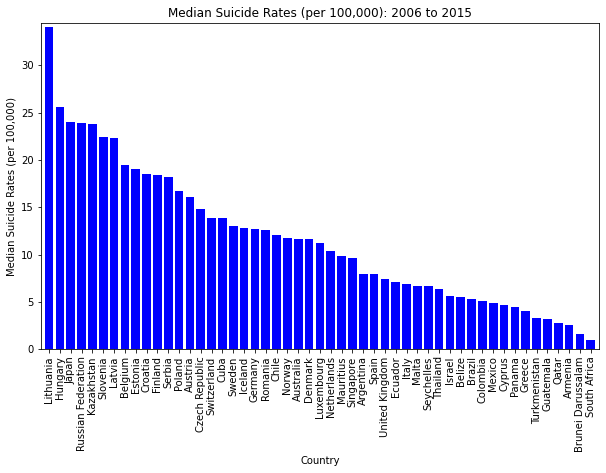

In [30]:
# make bar chart of median suicide rates
countries_sr = medians_df_SR['Median_Suicide_Rate'].tolist()
countries = medians_df_SR['Country'].tolist()
x_axis=np.arange(len(countries))
plt.subplots(figsize=(10,6))
plt.bar(x_axis, countries_sr, color="b", align="center")
plt.xticks(x_axis, countries, rotation='vertical')
# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)
# Set the limits of the y axis
plt.ylim(0, max(countries_sr)+0.4)
# Give the chart a title, x label, and y label
plt.title("Median Suicide Rates (per 100,000): 2006 to 2015")
plt.xlabel("Country")
plt.ylabel("Median Suicide Rates (per 100,000)")
# Save an image of the chart and print it to the screen
plt.savefig("images/MedianSR_barchart.png")
plt.show()

In [31]:
#sort medians df on ExpR
medians_df_Exp=medians_df.sort_values("Median_Health_Expenditure", ascending=False)


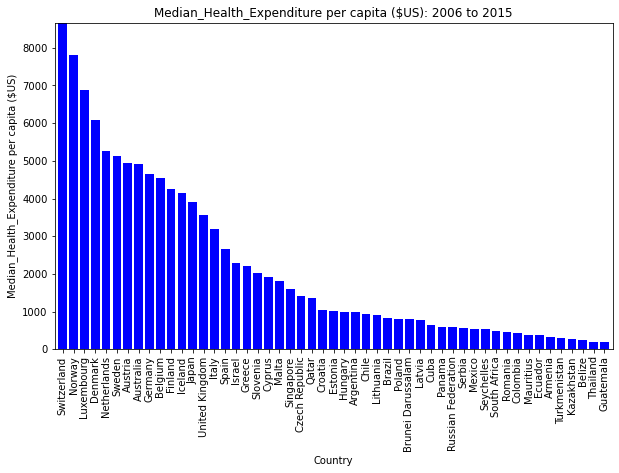

In [32]:
# make bar chart of median expenditure 
countries_sr = medians_df_Exp['Median_Health_Expenditure'].tolist()
countries = medians_df_Exp['Country'].tolist()
x_axis=np.arange(len(countries))
plt.subplots(figsize=(10,6))
plt.bar(x_axis, countries_sr, color="b", align="center")
plt.xticks(x_axis, countries, rotation='vertical')
# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)
# Set the limits of the y axis
plt.ylim(0, max(countries_sr)+0.4)
# Give the chart a title, x label, and y label
plt.title("Median_Health_Expenditure per capita ($US): 2006 to 2015")
plt.xlabel("Country")
plt.ylabel("Median_Health_Expenditure per capita ($US)")
# Save an image of the chart and print it to the screen
plt.savefig("images/MedianExpnd_barchart.png")
plt.show()

In [33]:
#Lists for Exp and SR 
Expenditure_list = medians_df["Median_Health_Expenditure"].tolist()
SuicideRate_list = medians_df['Median_Suicide_Rate'].tolist()


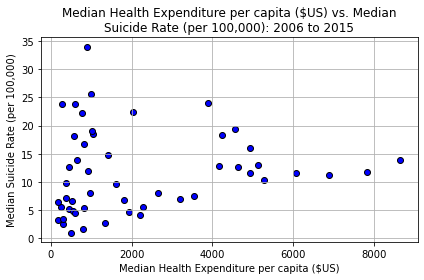

In [34]:
#Expenditure vs SR scatterplot
title0=("Median Health Expenditure per capita ($US) vs. Median Suicide Rate (per 100,000): 2006 to 2015")
#plt.title("Median_Health_Expenditure per capita ($US) vs. Median_Suicide_Rate (per 100,000): 2006 to 2015")
plt.title('\n'.join(wrap(title0,60)))
plt.scatter(Expenditure_list, SuicideRate_list, marker="o", color="blue", edgecolor='black')
plt.grid(True)
plt.xlabel('Median Health Expenditure per capita ($US)')
plt.ylabel('Median Suicide Rate (per 100,000)')
plt.savefig('images/Exp_vs_SR_scatterplot.png')
plt.tight_layout()
plt.show()

In [35]:
#export cleaned data frame to csv
data_06_to_15_df.to_csv("./output_data/data_06_to_2015.csv", index=False)
#export descriptives table of 06 to 15 data
descriptives_df.to_csv("./output_data/descriptives_table.csv", index=False)  



In [36]:
# get top 5 and bottom 5 health expenditure countries and box plot suicide rates of each over 10 yr period
decend_median_expend=medians_df_Exp["Country"].tolist()
top5_expend = []
bottom5_expend =[]
middle=[]

for country in decend_median_expend:
    if len(top5_expend)<5:
        top5_expend.append(country)
    elif len(middle)<41: 
        middle.append(country)
    elif len(middle)==41:
        bottom5_expend.append(country)
        
print('middle='+str(len(middle)))  
print(f"The top 5 countries for Health Expenditure are: {top5_expend}")  
print(f"The bottom 5 countries for Health Expenditure are: {bottom5_expend}")

middle=41
The top 5 countries for Health Expenditure are: ['Switzerland', 'Norway', 'Luxembourg', 'Denmark', 'Netherlands']
The bottom 5 countries for Health Expenditure are: ['Turkmenistan', 'Kazakhstan', 'Belize', 'Thailand', 'Guatemala']


In [37]:
#create dataframe with raw SR rates for top and bottom 10 expend countries
expend_10_data_06_to_15 = data_06_to_15_df.set_index("country")
expend_10 = expend_10_data_06_to_15.drop(middle, axis=0)
expend_10 = expend_10.reset_index()
expend_10 = pd.DataFrame(expend_10, columns =["country",
                                              "year",
                                              "number of suicides (per 100,000 people)"])
expend_10


,country,year,"number of suicides (per 100,000 people)"
0,Belize,2006,4.350818
1,Belize,2007,3.069050
2,Belize,2008,4.097033
3,Belize,2009,5.431064
4,Belize,2010,5.285487
...,...,...,...
95,Turkmenistan,2011,2.810145
96,Turkmenistan,2012,2.942394
97,Turkmenistan,2013,2.127187
98,Turkmenistan,2014,2.826722


In [38]:
#create list of SR for each of the 10 expenditure countries 
#'Switzerland', 'Norway', 'Luxembourg', 'Denmark', 'Netherlands'
#'Turkmenistan', 'Kazakhstan', 'Belize', 'Thailand', 'Guatemala'
Switzerland = expend_10.loc[expend_10["country"]=="Switzerland",:]
Switzerland_SR = Switzerland["number of suicides (per 100,000 people)"].to_list()

Norway = expend_10.loc[expend_10["country"]=="Norway",:]
Norway_SR = Norway["number of suicides (per 100,000 people)"].to_list()

Luxembourg = expend_10.loc[expend_10["country"]=="Luxembourg",:]
Luxembourg_SR = Luxembourg["number of suicides (per 100,000 people)"].to_list()

Denmark = expend_10.loc[expend_10["country"]=="Denmark",:]
Denmark_SR = Denmark["number of suicides (per 100,000 people)"].to_list()

Netherlands = expend_10.loc[expend_10["country"]=="Netherlands",:]
Netherlands_SR = Netherlands["number of suicides (per 100,000 people)"].to_list()

Turkmenistan = expend_10.loc[expend_10["country"]=="Turkmenistan",:]
Turkmenistan_SR = Turkmenistan["number of suicides (per 100,000 people)"].to_list()

Kazakhstan = expend_10.loc[expend_10["country"]=="Kazakhstan",:]
Kazakhstan_SR = Kazakhstan["number of suicides (per 100,000 people)"].to_list()

Belize = expend_10.loc[expend_10["country"]=="Belize",:]
Belize_SR = Belize["number of suicides (per 100,000 people)"].to_list()

Thailand = expend_10.loc[expend_10["country"]=="Thailand",:]
Thailand_SR = Thailand["number of suicides (per 100,000 people)"].to_list()

Guatemala = expend_10.loc[expend_10["country"]=="Guatemala",:]
Guatemala_SR = Guatemala["number of suicides (per 100,000 people)"].to_list()


<Figure size 1080x1080 with 0 Axes>

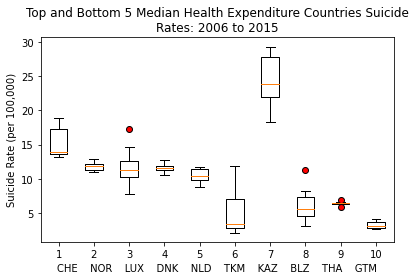

In [39]:
# box plot the 
data = [Switzerland_SR, Norway_SR, Luxembourg_SR, Denmark_SR, Netherlands_SR, 
        Turkmenistan_SR, Kazakhstan_SR, Belize_SR, Thailand_SR, Guatemala_SR[::2]]
plt.figure(figsize=(15,15))
fig1, ax1 = plt.subplots()
marker= dict(markerfacecolor='r', marker='o')
title1=('Top and Bottom 5 Median Health Expenditure Countries Suicide Rates: 2006 to 2015') 
ax1.set_title('\n'.join(wrap(title1,60)))
ax1.set_ylabel('Suicide Rate (per 100,000)')
ax1.set_xlabel(data)
ax1.set_xlabel('CHE    NOR    LUX    DNK    NLD    TKM    KAZ    BLZ    THA    GTM')
ax1.boxplot(data, flierprops=marker)
plt.tight_layout()
plt.savefig('./images/10expend_SR_boxplots.png')
plt.show()


In [40]:
# get top 5 and bottom 5 suicide rate countries and box plot health expend rates of each over 10 yr period
decend_median_SR=medians_df_SR["Country"].tolist()
top5_SR = []
bottom5_SR =[]
mid_SR=[]

for country in decend_median_SR:
    if len(top5_SR)<5:
        top5_SR.append(country)
    elif len(mid_SR)<41: 
        mid_SR.append(country)
    elif len(middle)==41:
        bottom5_SR.append(country)
        
print('middle='+str(len(mid_SR)))  
print(f"The top 5 countries for Median Suicide Rate are: {top5_SR}")  
print(f"The bottom 5 countries for Median Suicide Rate are: {bottom5_SR}")

middle=41
The top 5 countries for Median Suicide Rate are: ['Lithuania', 'Hungary', 'Japan', 'Russian Federation', 'Kazakhstan']
The bottom 5 countries for Median Suicide Rate are: ['Guatemala', 'Qatar', 'Armenia', 'Brunei Darussalam', 'South Africa']


In [41]:
#create dataframe with health expend rates for top and bottom 10 SR countries
SR_10_data_06_to_15 = data_06_to_15_df.set_index("country")
SR_10 = SR_10_data_06_to_15.drop(mid_SR, axis=0)
SR_10 = SR_10.reset_index()
SR_10 = pd.DataFrame(SR_10, columns =["country",
                                              "year",
                                              "health expenditure (per capita)"])
SR_10


,country,year,health expenditure (per capita)
0,Armenia,2006,126.244705
1,Armenia,2007,172.576080
2,Armenia,2008,266.256439
3,Armenia,2009,252.792526
4,Armenia,2010,297.229889
...,...,...,...
95,South Africa,2011,597.359436
96,South Africa,2012,579.748535
97,South Africa,2013,526.499573
98,South Africa,2014,509.833221


In [42]:
#create list of SR for each of the 10 expenditure countries 
#'Lithuania', 'Hungary', 'Japan', 'Russian Federation', 'Kazakhstan'
#'Guatemala', 'Qatar', 'Armenia', 'Brunei Darussalam', 'South Africa'
Lithuania = SR_10.loc[SR_10["country"]=='Lithuania',:]
Lithuania_Expd = Lithuania["health expenditure (per capita)"].to_list()

Hungary = SR_10.loc[SR_10["country"]=="Hungary",:]
Hungary_Expd = Hungary["health expenditure (per capita)"].to_list()

Japan = SR_10.loc[SR_10["country"]=="Japan",:]
Japan_Expd = Japan["health expenditure (per capita)"].to_list()

Russia = SR_10.loc[SR_10["country"]=="Russian Federation",:]
Russia_Expd = Russia["health expenditure (per capita)"].to_list()

Kazakhstan = SR_10.loc[SR_10["country"]=="Kazakhstan",:]
Kazakhstan_Expd = Kazakhstan["health expenditure (per capita)"].to_list()

Guatemala = SR_10.loc[SR_10["country"]=="Guatemala",:]
Guatemala_Expd = Guatemala["health expenditure (per capita)"].to_list()

Qatar = SR_10.loc[SR_10["country"]=="Qatar",:]
Qatar_Expd = Qatar["health expenditure (per capita)"].to_list()

Armenia = SR_10.loc[SR_10["country"]=="Armenia",:]
Armenia_Expd = Armenia["health expenditure (per capita)"].to_list()

Brunei = SR_10.loc[SR_10["country"]=="Brunei Darussalam",:]
Brunei_Expd = Brunei["health expenditure (per capita)"].to_list()

South_Africa = SR_10.loc[SR_10["country"]=="South Africa",:]
South_Africa_Expd = South_Africa["health expenditure (per capita)"].to_list()

<Figure size 1440x1440 with 0 Axes>

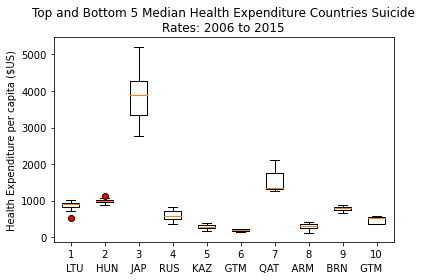

In [43]:
# box plot the 
data = [Lithuania_Expd, Hungary_Expd, Japan_Expd, Russia_Expd, Kazakhstan_Expd, 
        Guatemala_Expd, Qatar_Expd , Armenia_Expd, Brunei_Expd, South_Africa_Expd[::2]]
plt.figure(figsize=(20,20))
fig1, ax1 = plt.subplots()
marker= dict(markerfacecolor='r', marker='o')
title2=('Top and Bottom 5 Median Suicide Rate Countries Health Expenditure: 2006 to 2015') 
ax1.set_title('\n'.join(wrap(title1,60)))
ax1.set_ylabel('Health Expenditure per capita ($US)')
ax1.set_xlabel(data)
ax1.set_xlabel('LTU    HUN    JAP    RUS    KAZ    GTM    QAT    ARM    BRN    GTM')
ax1.boxplot(data, flierprops=marker)
plt.tight_layout()
plt.savefig('./images/10SR_Exp_boxplots.png')
plt.show()

In [44]:
# import IMF classification with countries dataset
classified_csv = pd.read_csv("./output_data/complete_dataset_classified.csv")
classified_df = classified_csv
classified_df

,country,year,"number of suicides (per 100,000 people)",health expenditure (per capita),country classification
0,Argentina,2006,8.652830,447.361176,Developing Countries
1,Argentina,2007,8.112240,551.750000,Developing Countries
2,Argentina,2008,8.327544,694.682434,Developing Countries
3,Argentina,2009,7.761451,742.843018,Developing Countries
4,Argentina,2010,7.831615,891.137756,Developing Countries
...,...,...,...,...,...
495,United Kingdom,2011,7.460703,3501.949707,Developed Countries
496,United Kingdom,2012,7.442810,3492.889648,Developed Countries
497,United Kingdom,2013,8.027719,4207.887695,Developed Countries
498,United Kingdom,2014,7.904841,4601.137207,Developed Countries


In [45]:
# prepare data for making a pie graph by developing status

developed = classified_df.loc[classified_df["country classification"]=='Developed Countries',:]
developed_list= developed["country classification"].to_list()

developing = classified_df.loc[classified_df["country classification"]=='Developing Countries',:]
developing_list = developing["country classification"].to_list()

status = ["Developing Countries","Developed Countries"]
Developing_countries = int(len(developing_list))
Developed_countries = int(len(developed_list))
country_classification=[Developing_countries,Developed_countries]
print(country_classification)
colors = ["orange", "blue"]
explode = (0, 0.05)

[240, 260]


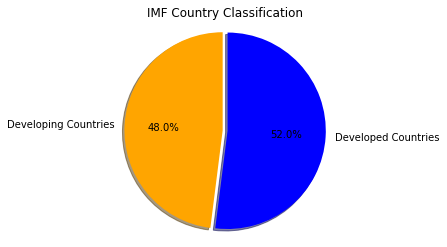

In [46]:
# plot pie graph of IMF country classification
plt.title("IMF Country Classification")
plt.pie(country_classification, explode=explode, labels=status, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig('./images/Classification_pie.png')
plt.show()

In [47]:
# get decriptives of developing countries 
developing_descriptives = developing.describe()
developing_descriptives

,year,"number of suicides (per 100,000 people)",health expenditure (per capita)
count,240.000000,240.000000,240.000000
mean,2010.500000,9.621462,594.435829
std,2.878284,7.543903,348.061150
min,2006.000000,0.567653,104.427551
25%,2008.000000,4.060634,331.438370
50%,2010.500000,6.678897,529.508636
75%,2013.000000,13.975459,797.514053
max,2015.000000,31.482564,2104.407227


In [48]:
#import data for developing only
developing_countries_csv = pd.read_csv("./output_data/developing_countries.csv")
developing_countries_csv

,country,year,"number of suicides (per 100,000 people)",health expenditure (per capita),country classification
0,Argentina,2006,8.652830,447.361176,Developing Countries
1,Argentina,2007,8.112240,551.750000,Developing Countries
2,Argentina,2008,8.327544,694.682434,Developing Countries
3,Argentina,2009,7.761451,742.843018,Developing Countries
4,Argentina,2010,7.831615,891.137756,Developing Countries
...,...,...,...,...,...
235,Turkmenistan,2011,2.810145,276.651703,Developing Countries
236,Turkmenistan,2012,2.942394,318.807312,Developing Countries
237,Turkmenistan,2013,2.127187,376.223877,Developing Countries
238,Turkmenistan,2014,2.826722,437.752808,Developing Countries


In [49]:
#data for years developing countries
dving_2006 = developing_countries_csv.loc[developing_countries_csv["year"]==2006,:]
dving_2007 = developing_countries_csv.loc[developing_countries_csv["year"]==2007,:]
dving_2008 = developing_countries_csv.loc[developing_countries_csv["year"]==2008,:]
dving_2009 = developing_countries_csv.loc[developing_countries_csv["year"]==2009,:]
dving_2010 = developing_countries_csv.loc[developing_countries_csv["year"]==2010,:]
dving_2011 = developing_countries_csv.loc[developing_countries_csv["year"]==2011,:]
dving_2012 = developing_countries_csv.loc[developing_countries_csv["year"]==2012,:]
dving_2013 = developing_countries_csv.loc[developing_countries_csv["year"]==2013,:]
dving_2014 = developing_countries_csv.loc[developing_countries_csv["year"]==2014,:]
dving_2015 = developing_countries_csv.loc[developing_countries_csv["year"]==2015,:]


In [50]:
#medians for SR years developing countries
dving_06_SR_median = round(dving_2006["number of suicides (per 100,000 people)"].median(),2)
dving_07_SR_median = round(dving_2007["number of suicides (per 100,000 people)"].median(),2)
dving_08_SR_median = round(dving_2008["number of suicides (per 100,000 people)"].median(),2)
dving_09_SR_median = round(dving_2009["number of suicides (per 100,000 people)"].median(),2)
dving_10_SR_median = round(dving_2010["number of suicides (per 100,000 people)"].median(),2)
dving_11_SR_median = round(dving_2011["number of suicides (per 100,000 people)"].median(),2)
dving_12_SR_median = round(dving_2012["number of suicides (per 100,000 people)"].median(),2)
dving_13_SR_median = round(dving_2013["number of suicides (per 100,000 people)"].median(),2)
dving_14_SR_median = round(dving_2014["number of suicides (per 100,000 people)"].median(),2)
dving_15_SR_median = round(dving_2015["number of suicides (per 100,000 people)"].median(),2)

SRdving_median_list =(dving_06_SR_median,dving_07_SR_median,dving_08_SR_median,dving_09_SR_median,
                 dving_10_SR_median,dving_11_SR_median,dving_12_SR_median,dving_13_SR_median, 
                 dving_14_SR_median,dving_15_SR_median)
SRdving_median_list

(7.94, 7.61, 6.79, 5.94, 6.56, 6.59, 6.31, 6.06, 6.04, 7.56)

In [51]:
#import data for developed only
developed_countries_csv = pd.read_csv("./output_data/developed_countries.csv")
developed_countries_csv

,country,year,"number of suicides (per 100,000 people)",health expenditure (per capita),country classification
0,Australia,2006,11.078407,3177.460693,Developed Countries
1,Australia,2007,11.294980,3794.251709,Developed Countries
2,Australia,2008,11.635008,4088.778076,Developed Countries
3,Australia,2009,11.383720,3997.537109,Developed Countries
4,Australia,2010,11.608080,4952.777344,Developed Countries
...,...,...,...,...,...
255,United Kingdom,2011,7.460703,3501.949707,Developed Countries
256,United Kingdom,2012,7.442810,3492.889648,Developed Countries
257,United Kingdom,2013,8.027719,4207.887695,Developed Countries
258,United Kingdom,2014,7.904841,4601.137207,Developed Countries


In [52]:
# get total medians
median_SR_deving = round(developing["number of suicides (per 100,000 people)"].median(),2)
median_Hex_deving = round(developing["health expenditure (per capita)"].median(),2)
median_SR_dved= round(developed["number of suicides (per 100,000 people)"].median(),2)
median_Hex_dved= round(developed["health expenditure (per capita)"].median(),2)
print(f'Median SR for Developing = {median_SR_deving}')
print(f'Median Health Exp for Developing = {median_Hex_deving}')
print(f'Median SR for Developed = {median_SR_dved}')
print(f'Median Health Exp for Developed = {median_Hex_dved}')

Median SR for Developing = 6.68
Median Health Exp for Developing = 529.51
Median SR for Developed = 12.53
Median Health Exp for Developed = 3497.42


In [53]:
#data for years developed countries
dved_2006 = developed_countries_csv.loc[developed_countries_csv["year"]==2006,:]
dved_2007 = developed_countries_csv.loc[developed_countries_csv["year"]==2007,:]
dved_2008 = developed_countries_csv.loc[developed_countries_csv["year"]==2008,:]
dved_2009 = developed_countries_csv.loc[developed_countries_csv["year"]==2009,:]
dved_2010 = developed_countries_csv.loc[developed_countries_csv["year"]==2010,:]
dved_2011 = developed_countries_csv.loc[developed_countries_csv["year"]==2011,:]
dved_2012 = developed_countries_csv.loc[developed_countries_csv["year"]==2012,:]
dved_2013 = developed_countries_csv.loc[developed_countries_csv["year"]==2013,:]
dved_2014 = developed_countries_csv.loc[developed_countries_csv["year"]==2014,:]
dved_2015 = developed_countries_csv.loc[developed_countries_csv["year"]==2015,:]


In [54]:
#medians for SR years developed countries
dved_06_SR_median = round(dved_2006["number of suicides (per 100,000 people)"].median(),2)
dved_07_SR_median = round(dved_2007["number of suicides (per 100,000 people)"].median(),2)
dved_08_SR_median = round(dved_2008["number of suicides (per 100,000 people)"].median(),2)
dved_09_SR_median = round(dved_2009["number of suicides (per 100,000 people)"].median(),2)
dved_10_SR_median = round(dved_2010["number of suicides (per 100,000 people)"].median(),2)
dved_11_SR_median = round(dved_2011["number of suicides (per 100,000 people)"].median(),2)
dved_12_SR_median = round(dved_2012["number of suicides (per 100,000 people)"].median(),2)
dved_13_SR_median = round(dved_2013["number of suicides (per 100,000 people)"].median(),2)
dved_14_SR_median = round(dved_2014["number of suicides (per 100,000 people)"].median(),2)
dved_15_SR_median = round(dved_2015["number of suicides (per 100,000 people)"].median(),2)

SRdved_median_list =(dved_06_SR_median, dved_07_SR_median, dved_08_SR_median, dved_09_SR_median,
                     dved_10_SR_median, dved_11_SR_median, dved_12_SR_median, dved_13_SR_median,
                     dved_14_SR_median, dved_15_SR_median)
SRdved_median_list

(12.56, 12.36, 11.85, 12.18, 12.38, 11.99, 12.49, 12.57, 12.97, 12.94)

In [55]:
#Health Expd medians for years developing countries
dving_06_HEx_median = round(dving_2006["health expenditure (per capita)"].median(),2)
dving_07_HEx_median = round(dving_2007["health expenditure (per capita)"].median(),2)
dving_08_HEx_median = round(dving_2008["health expenditure (per capita)"].median(),2)
dving_09_HEx_median = round(dving_2009["health expenditure (per capita)"].median(),2)
dving_10_HEx_median = round(dving_2010["health expenditure (per capita)"].median(),2)
dving_11_HEx_median = round(dving_2011["health expenditure (per capita)"].median(),2)
dving_12_HEx_median = round(dving_2012["health expenditure (per capita)"].median(),2)
dving_13_HEx_median = round(dving_2013["health expenditure (per capita)"].median(),2)
dving_14_HEx_median = round(dving_2014["health expenditure (per capita)"].median(),2)
dving_15_HEx_median = round(dving_2015["health expenditure (per capita)"].median(),2)

HExdving_median_list = (dving_06_HEx_median,dving_07_HEx_median,dving_08_HEx_median,
                        dving_09_HEx_median, dving_10_HEx_median,dving_11_HEx_median,
                        dving_12_HEx_median,dving_13_HEx_median, dving_14_HEx_median, 
                        dving_15_HEx_median )
HExdving_median_list

(367.01, 444.45, 505.56, 463.51, 539.16, 581.24, 580.25, 622.7, 602.35, 528.68)

In [56]:
#Health Expd medians for years developed countries
dved_06_HEx_median = round(dved_2006["health expenditure (per capita)"].median(),2)
dved_07_HEx_median = round(dved_2007["health expenditure (per capita)"].median(),2)
dved_08_HEx_median = round(dved_2008["health expenditure (per capita)"].median(),2)
dved_09_HEx_median = round(dved_2009["health expenditure (per capita)"].median(),2)
dved_10_HEx_median = round(dved_2010["health expenditure (per capita)"].median(),2)
dved_11_HEx_median = round(dved_2011["health expenditure (per capita)"].median(),2)
dved_12_HEx_median = round(dved_2012["health expenditure (per capita)"].median(),2)
dved_13_HEx_median = round(dved_2013["health expenditure (per capita)"].median(),2)
dved_14_HEx_median = round(dved_2014["health expenditure (per capita)"].median(),2)
dved_15_HEx_median = round(dved_2015["health expenditure (per capita)"].median(),2)

HExdved_median_list =(dved_06_HEx_median,dved_07_HEx_median,dved_08_HEx_median,
                      dved_09_HEx_median,dved_10_HEx_median, dved_11_HEx_median,
                      dved_12_HEx_median, dved_13_HEx_median, dved_14_HEx_median,
                      dved_15_HEx_median)
HExdved_median_list

(3003.82,
 3414.33,
 3548.11,
 3505.1,
 3477.14,
 3684.66,
 3599.85,
 4119.33,
 4287.84,
 3927.79)

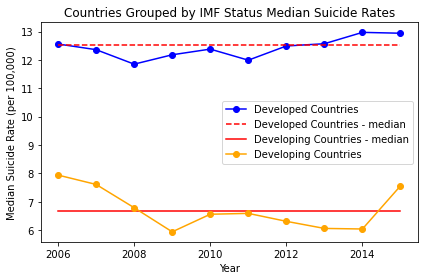

In [57]:
# plot developed countries SR line
x1 = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
y1 = [12.56, 12.36, 11.85, 12.18, 12.38, 11.99, 12.49, 12.57, 12.97, 12.94]
plt.plot(x1, y1, label = "Developed Countries", marker='o', color= 'blue')
# plot developing countries SR line
x2 = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
y2 = [7.94, 7.61, 6.79, 5.94, 6.56, 6.59, 6.31, 6.06, 6.04, 7.56]
# mean line for deving countries SR
x3 = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
y3 = [6.68,6.68,6.68,6.68,6.68,6.68,6.68,6.68,6.68,6.68]
# mean line for deved countries SR
x4 = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
y4 = [12.53,12.53,12.53,12.53,12.53,12.53,12.53,12.53,12.53,12.53]
# plotting the line devling mean HEx points 
plt.plot(x4, y4, label = "Developed Countries - median", linestyle='dashed',  color='red')
plt.plot(x3, y3, label = "Developing Countries - median", color='red')
# plotting the line 2 points 
plt.plot(x2, y2, label = "Developing Countries", marker='o', color='orange')
plt.xlabel('Year')
# Set the y axis label of the current axis.
plt.ylabel('Median Suicide Rate (per 100,000)')
# Set a title of the current axes.
plt.title('Countries Grouped by IMF Status Median Suicide Rates')
# show a legend on the plot
plt.legend()
# Display a figure.

plt.tight_layout()
plt.savefig('./images/IMFgrp_SR_line.png')
plt.show()

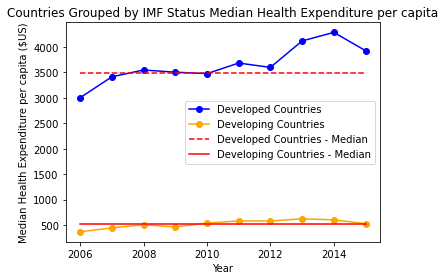

In [59]:
# plot developed countries HEx line
x3 = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
y3 = [3003.82, 3414.33, 3548.11, 3505.1, 3477.14, 3684.66, 3599.85, 4119.33, 4287.84, 3927.79]
plt.plot(x3, y3, label = "Developed Countries", marker="o", color='blue')
# plot developing countries HEx  line
x4 = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
y4 = [367.01, 444.45, 505.56, 463.51, 539.16, 581.24, 580.25, 622.7, 602.35, 528.68]
# mean line for dev countries HEx
x5 = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
y5 = [529.51, 529.51, 529.51, 529.51, 529.51, 529.51, 529.51, 529.51, 529.51, 529.51]
# mean line for dev countries HEx
x6 = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
y6 = [3497.42, 3497.42, 3497.42, 3497.42, 3497.42, 3497.42, 3497.42, 3497.42, 3497.42, 3497.42]
# plotting the line devling HEx points 
plt.plot(x4, y4, label = "Developing Countries", marker="o", color ='orange')
# plotting the line devling mean HEx points 
plt.plot(x6, y6, label = "Developed Countries - Median", linestyle='dashed', color='red')
plt.plot(x5, y5, label = "Developing Countries - Median", color='red')
plt.xlabel('Year')
# Set the y axis label of the current axis.
plt.ylabel('Median Health Expenditure per capita ($US)')
# Set a title of the current axes.
plt.title('Countries Grouped by IMF Status Median Health Expenditure per capita')

# show a legend on the plot
plt.legend()
# Display a figure.

plt.tight_layout()
plt.savefig('./images/IMFgrp_HEx_line.png')
plt.show()

In [60]:
#get decriptives of developing countries 
developing_descriptives = developing.describe()
developing_descriptives

,year,"number of suicides (per 100,000 people)",health expenditure (per capita)
count,240.000000,240.000000,240.000000
mean,2010.500000,9.621462,594.435829
std,2.878284,7.543903,348.061150
min,2006.000000,0.567653,104.427551
25%,2008.000000,4.060634,331.438370
50%,2010.500000,6.678897,529.508636
75%,2013.000000,13.975459,797.514053
max,2015.000000,31.482564,2104.407227


In [61]:
# get decriptives of developed countries 
developed_descriptives = developed.describe()
developed_descriptives

,year,"number of suicides (per 100,000 people)",health expenditure (per capita)
count,260.000000,260.000000,260.000000
mean,2010.500000,13.620562,3694.917564
std,2.877821,7.003382,2171.343034
min,2006.000000,2.607863,536.057373
25%,2008.000000,8.035618,1914.354462
50%,2010.500000,12.528694,3497.419678
75%,2013.000000,17.624598,5025.566040
max,2015.000000,38.658504,10014.708980
